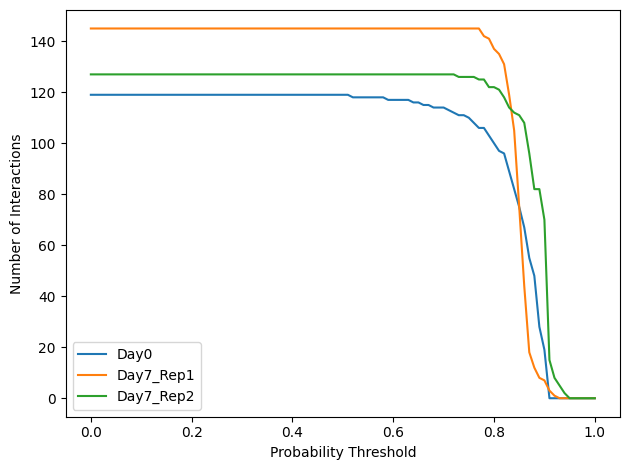

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



# # Merge datasets with Omnipath database
# day0 = pd.merge(day0, Omnipath_database, left_on=["Src", "Dst"], right_on=["from", "to"])[["Src", "Dst"]].drop_duplicates()
# day7_rep1 = pd.merge(day7_rep1, Omnipath_database, left_on=["Src", "Dst"], right_on=["from", "to"])[["Src", "Dst"]].drop_duplicates()
# day7_rep2 = pd.merge(day7_rep2, Omnipath_database, left_on=["Src", "Dst"], right_on=["from", "to"])[["Src", "Dst"]].drop_duplicates()

# Set up probability thresholds
prob_thresholds = [i / 100.0 for i in range(0, 101)]

# Initialize lists to store lengths
day0_lengths = []
day7_rep1_lengths = []
day7_rep2_lengths = []

# Iterate over probability thresholds
for threshold in prob_thresholds:
    # Read the data
    day0 = pd.read_csv("../../data/CellGATv2_Output/Pre_Post/Day0/CCI.csv", index_col=0)
    day7_rep1 = pd.read_csv("../../data/CellGATv2_Output/Pre_Post/Day7_1/CCI.csv", index_col=0)
    day7_rep2 = pd.read_csv("../../data/CellGATv2_Output/Pre_Post/Day7_2/CCI.csv", index_col=0)

    # Read Omnipath database
    Omnipath_database = pd.read_csv("../../data/LR_database/intercell_Omnipath.csv", index_col=0)
    Omnipath_database.columns = ["from", "to", "sources"]
    # Filter datasets based on probability threshold
    day0_filtered = day0[day0["Prob"] > threshold].copy()
    day7_rep1_filtered = day7_rep1[day7_rep1["Prob"] > threshold].copy()
    day7_rep2_filtered = day7_rep2[day7_rep2["Prob"] > threshold].copy()

    # Merge filtered datasets with Omnipath database
    day0_filtered = pd.merge(day0_filtered, Omnipath_database, left_on=["Src", "Dst"], right_on=["from", "to"])[["Src", "Dst"]].drop_duplicates()
    day7_rep1_filtered = pd.merge(day7_rep1_filtered, Omnipath_database, left_on=["Src", "Dst"], right_on=["from", "to"])[["Src", "Dst"]].drop_duplicates()
    day7_rep2_filtered = pd.merge(day7_rep2_filtered, Omnipath_database, left_on=["Src", "Dst"], right_on=["from", "to"])[["Src", "Dst"]].drop_duplicates()

    # Record lengths
    day0_lengths.append(len(day0_filtered))
    day7_rep1_lengths.append(len(day7_rep1_filtered))
    day7_rep2_lengths.append(len(day7_rep2_filtered))

# Plot the curves
plt.plot(prob_thresholds, day0_lengths, label='Day0')
plt.plot(prob_thresholds, day7_rep1_lengths, label='Day7_Rep1')
plt.plot(prob_thresholds, day7_rep2_lengths, label='Day7_Rep2')

# Add labels and legend
plt.xlabel('Probability Threshold')
plt.ylabel('Number of Interactions')
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../../results/pre_pro_compare.png')
plt.show()

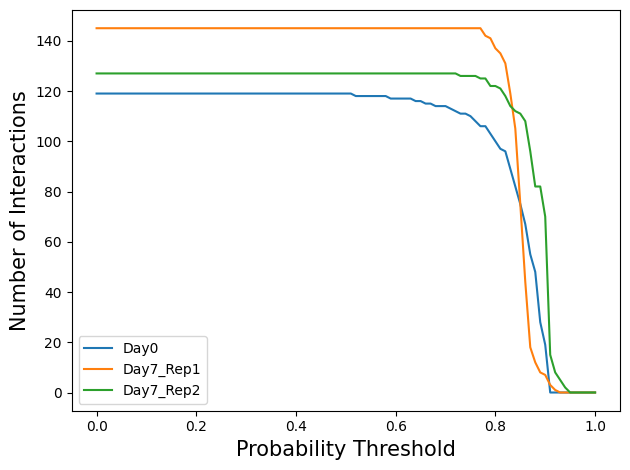

In [44]:
# Plot the curves
plt.plot(prob_thresholds, day0_lengths, label='Day0')
plt.plot(prob_thresholds, day7_rep1_lengths, label='Day7_Rep1')
plt.plot(prob_thresholds, day7_rep2_lengths, label='Day7_Rep2')

# Add labels and legend
plt.xlabel('Probability Threshold', fontsize=15)
plt.ylabel('Number of Interactions', fontsize=15)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../../results/pre_pro_compare.png',dpi=300)
plt.show()

In [24]:
import pandas as pd
day0=pd.read_csv("../../data/CellGATv2_Output/Pre_Post/Day0/CCI.csv",index_col=0)
day7_rep1=pd.read_csv("../../data/CellGATv2_Output/Pre_Post/Day7_1/CCI.csv",index_col=0)
day7_rep2=pd.read_csv("../../data/CellGATv2_Output/Pre_Post/Day7_2/CCI.csv",index_col=0)

Omnipath_database = pd.read_csv("../../data/LR_database/intercell_Omnipath.csv",index_col=0)
Omnipath_database.columns = ["from","to","sources"]

day0=pd.merge(day0,Omnipath_database,left_on=["Src","Dst"],right_on=["from","to"])[["Src","Dst"]].drop_duplicates()
day7_rep1=pd.merge(day7_rep1,Omnipath_database,left_on=["Src","Dst"],right_on=["from","to"])[["Src","Dst"]].drop_duplicates()
day7_rep2=pd.merge(day7_rep2,Omnipath_database,left_on=["Src","Dst"],right_on=["from","to"])[["Src","Dst"]].drop_duplicates()
print(len(day0),len(day7_rep1),len(day7_rep2))

day0_1 = pd.merge(day0,day7_rep1,left_on=["Src","Dst"],right_on=["Src","Dst"])[["Src","Dst"]].drop_duplicates()
day0_1_2 = pd.merge(day0_1,day7_rep2,left_on=["Src","Dst"],right_on=["Src","Dst"])[["Src","Dst"]].drop_duplicates()
print("The intersection of three data sets:",len(day0_1_2))

day0_rep1=pd.merge(day0,day7_rep1,left_on=["Src","Dst"],right_on=["Src","Dst"])[["Src","Dst"]].drop_duplicates()
day0_rep2=pd.merge(day0,day7_rep2,left_on=["Src","Dst"],right_on=["Src","Dst"])[["Src","Dst"]].drop_duplicates()
day0_rep1_2=pd.merge(day7_rep1,day7_rep2,left_on=["Src","Dst"],right_on=["Src","Dst"])[["Src","Dst"]].drop_duplicates()
print("The intersection in day0 and day7_1:",len(day0_rep1))
print("The intersection in day0 and day7_2:",len(day0_rep2))
print("The intersection in day7_1 and day7_2:",len(day0_rep1_2))

119 145 127
The intersection of three data sets: 88
The intersection in day0 and day7_1: 94
The intersection in day0 and day7_2: 90
The intersection in day7_1 and day7_2: 124


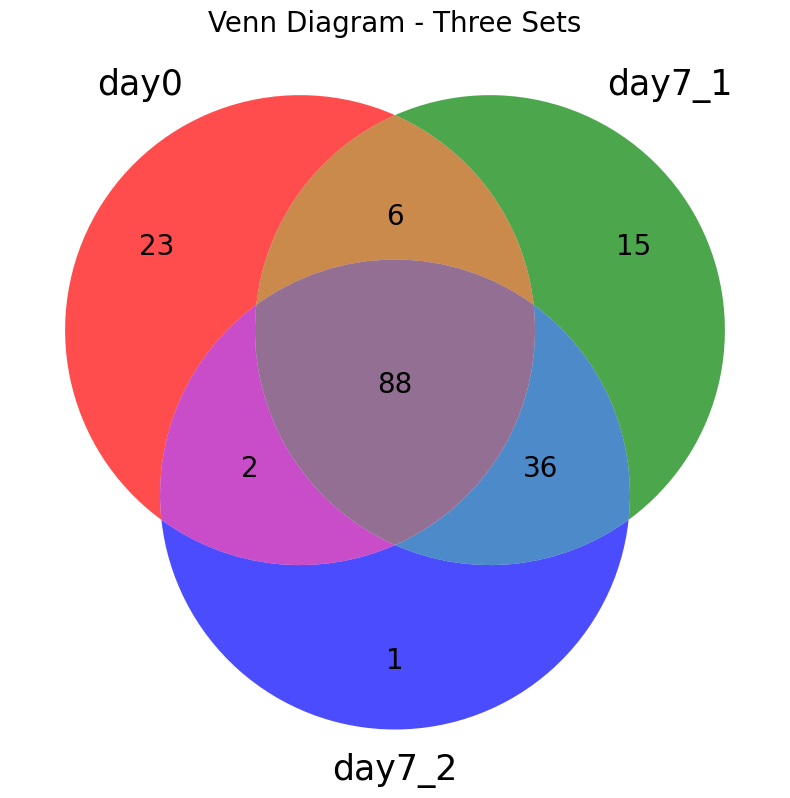

In [40]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 定义集合的数量
A_count = 119
B_count = 145
C_count = 127
A_B_overlap = 94
A_C_overlap = 90
B_C_overlap = 124
A_B_C_overlap = 88

# 创建一个包含三个集合的Venn图
venn_labels = {'100': A_count - A_B_overlap - A_C_overlap + A_B_C_overlap,
               '010': B_count - A_B_overlap - B_C_overlap + A_B_C_overlap,
               '001': C_count - A_C_overlap - B_C_overlap + A_B_C_overlap,
               '110': A_B_overlap - A_B_C_overlap,
               '101': A_C_overlap - A_B_C_overlap,
               '011': B_C_overlap - A_B_C_overlap,
               '111': A_B_C_overlap}

# 手动设置子集的权重，即面积
weighted_areas = (1, 1, 1, 1, 1, 1, 1)

plt.figure(figsize=(8, 8))

venn_diagram = venn3(subsets=weighted_areas,
                     set_labels=('day0', 'day7_1', 'day7_2'),
                     alpha=0.7,
                     normalize_to=1.0)

# 设置每个标签的字体大小
for label in venn_diagram.set_labels:
    label.set_fontsize(25)

# 添加子集标签，并设置字体大小
for subset, label in venn_labels.items():
    subset_label = venn_diagram.get_label_by_id(subset)
    subset_label.set_text(str(label))
    subset_label.set_fontsize(20)  # 设置字体大小为14


plt.title("Venn Diagram - Three Sets", fontsize=20)  # 设置标题字体大小为16
plt.tight_layout()
plt.savefig('../../results/pre_pro_venn.png', dpi=300)
plt.show()
